# Formulation of the CVRP with all the vechiles in one matrix

Packages importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
import pandas as pd

Data importation:

In [2]:
c = np.loadtxt("dist.txt")
## Distance matrix adds a cost to use the first arc so the use of a vehicle is included

Some important parameters

In [3]:
# Number of vehicles
Vehic = 6

# Number of clients
Clients = 12

# Big M
M = 100

Sets

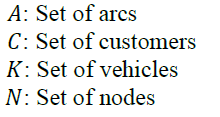

In [4]:
N = [i for i in range(Clients+1)]
C = [i for i in range(1,Clients+1)]
A = [(i,j) for i in N for j in N]

Getting the demand of each customer

In [5]:
demand = np.loadtxt("demand2.txt")
d = {i: demand[i] for i in C}

Final parameter, the capacity of the vehicle

In [6]:
q = 20

In [7]:
# Call the model
m = Model("VRP")
m.setParam("TimeLimit",60)

Academic license - for non-commercial use only - expires 2021-04-09
Using license file C:\Users\57316\gurobi.lic
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


Variables:

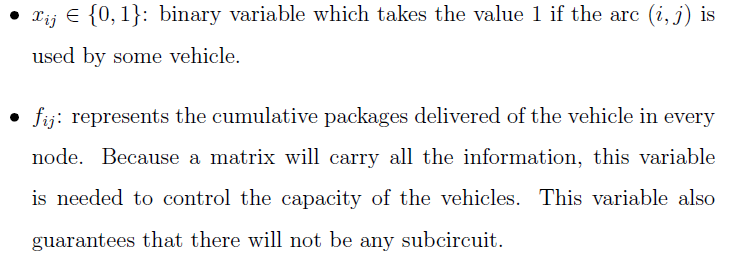

In [8]:
x = m.addVars(A,vtype=GRB.BINARY,name="x")
f = m.addVars(A, vtype=GRB.CONTINUOUS,lb=0,name="f")

Objective function

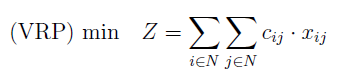

In [9]:
m.modelSense = GRB.MINIMIZE
m.setObjective(quicksum(c[i,j]*x[i,j] for i,j in A))

## Constraints
Every client must be visited once

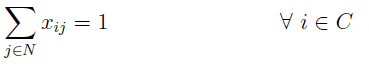

In [10]:
m.addConstrs(quicksum(x[i,j] for j in N)==1 for i in C);

The number of vehicles is limited

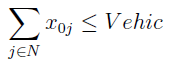

In [11]:
m.addConstr(quicksum(x[0,j] for j in N) <= Vehic);

The number of vehicles that leave the depot must be the same that return

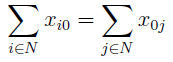

In [12]:
m.addConstr(quicksum(x[i,0] for i in N)==quicksum(x[0,j] for j in N));

Flow constraint

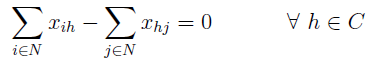

In [13]:
m.addConstrs(quicksum(x[i,h] for i in N)-quicksum(x[h,j] for j in N)==0 for h in C);

Diagonal must be different from zero

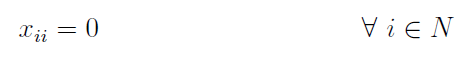

In [14]:
m.addConstrs(x[i,i] == 0 for i in N);

Load constraints

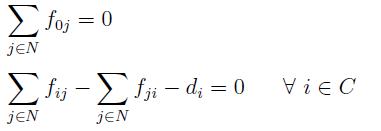

In [15]:
m.addConstr(quicksum(f[0,j] for j in N)==0);
m.addConstrs(quicksum(f[i,j] for j in N) - quicksum(f[j,i] for j in N) - d[i] == 0 for i in C);

Upper bound of f

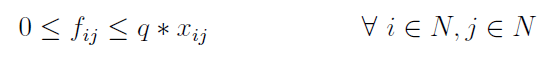

In [16]:
m.addConstrs(f[i,j] <= q*x[i,j] for i in N for j in N);

In [17]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 221 rows, 338 columns and 1133 nonzeros
Model fingerprint: 0x2f41748e
Variable types: 169 continuous, 169 integer (169 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [9e+00, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+00]
Presolve removed 39 rows and 38 columns
Presolve time: 0.01s
Presolved: 182 rows, 300 columns, 888 nonzeros
Variable types: 144 continuous, 156 integer (156 binary)

Root relaxation: objective 7.755364e+03, 237 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 7755.36350    0   27          - 7755.36350      -     -    0s
H    0     0                    9920.2000000 7755.36350  21.8%     -    0s
     0     0 7769.6005

In [18]:
m.printAttr("X")


    Variable            X 
-------------------------
      x[0,2]            1 
      x[0,6]            1 
     x[0,10]            1 
      x[1,5]            1 
      x[2,1]            1 
      x[3,7]            1 
      x[4,3]            1 
     x[5,12]            1 
      x[6,4]            1 
      x[7,0]            1 
      x[8,0]            1 
      x[9,8]            1 
    x[10,11]            1 
     x[11,9]            1 
     x[12,0]            1 
      f[1,5]           12 
      f[2,1]            5 
      f[3,7]           15 
      f[4,3]            9 
     f[5,12]           17 
      f[6,4]            5 
      f[7,0]           19 
      f[8,0]           20 
      f[9,8]           15 
    f[10,11]            6 
     f[11,9]           10 
     f[12,0]           20 
